# Ejercicio Práctico - Entrenando un clasificador

* Vamos a entrenar un clasificador binario. 

* Para esto vamos a utilizar un dataset de enfermedades cardiacas. 

* La idea es entrenar un clasificador que prediga si una persona tiene o no una enfremedad cardiaca. 

* Luego de entrenar el clasificador revisaremos el accuracy, precision y recall del clasificador. 

### Attribute Information
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* HeartDisease: output class [1: heart disease, 0: Normal]

In [32]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics

## Importamos y revisamos los datos

In [2]:
corazon=pd.read_csv('heart2.csv',sep=',')

In [3]:
corazon.head(3)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,M,140,289,0,172,N,0.0,0
1,49,F,160,180,0,156,N,1.0,1
2,37,M,130,283,0,98,N,0.0,0


In [4]:
corazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   RestingBP       918 non-null    int64  
 3   Cholesterol     918 non-null    int64  
 4   FastingBS       918 non-null    int64  
 5   MaxHR           918 non-null    int64  
 6   ExerciseAngina  918 non-null    object 
 7   Oldpeak         918 non-null    float64
 8   HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 64.7+ KB


In [6]:
corazon.shape

(918, 9)

## Revisamos NA´s

In [7]:
corazon.isna().sum()

Age               0
Sex               0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
HeartDisease      0
dtype: int64

In [8]:
corazon.dtypes

Age                 int64
Sex                object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
HeartDisease        int64
dtype: object

## Variables categoricas

In [9]:
# Sex
corazon.at[corazon["Sex"]=='M',"Sex"]=1 ## Masculino
corazon.at[corazon["Sex"]=='F',"Sex"]=0 ## Femenino

In [10]:
# Corazon
corazon.at[corazon["ExerciseAngina"]=='N',"ExerciseAngina"]=0 ## No
corazon.at[corazon["ExerciseAngina"]=='Y',"ExerciseAngina"]=1 ## Si

In [11]:
corazon.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,140,289,0,172,0,0.0,0
1,49,0,160,180,0,156,0,1.0,1
2,37,1,130,283,0,98,0,0.0,0
3,48,0,138,214,0,108,1,1.5,1
4,54,1,150,195,0,122,0,0.0,0


In [12]:
corazon["ExerciseAngina"]=corazon["ExerciseAngina"].astype(int)
corazon["Sex"]=corazon["Sex"].astype(int)

In [13]:
corazon.dtypes

Age                 int64
Sex                 int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
HeartDisease        int64
dtype: object

### Revisemos las variables

In [50]:
corr = corazon.corr()
corr

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
Age,1.000000,0.055750,0.254399,-0.095282,0.198039,-0.382045,0.215793,0.258612,0.282039
Sex,0.055750,1.000000,0.005133,-0.200092,0.120076,-0.189186,0.190664,0.105734,0.305445
RestingBP,0.254399,0.005133,1.000000,0.100893,0.070193,-0.112135,0.155101,0.164803,0.107589
Cholesterol,-0.095282,-0.200092,0.100893,1.000000,-0.260974,0.235792,-0.034166,0.050148,-0.232741
FastingBS,0.198039,0.120076,0.070193,-0.260974,1.000000,-0.131438,0.060451,0.052698,0.267291
MaxHR,-0.382045,-0.189186,-0.112135,0.235792,-0.131438,1.000000,-0.370425,-0.160691,-0.400421
ExerciseAngina,0.215793,0.190664,0.155101,-0.034166,0.060451,-0.370425,1.000000,0.408752,0.494282
Oldpeak,0.258612,0.105734,0.164803,0.050148,0.052698,-0.160691,0.408752,1.000000,0.403951
HeartDisease,0.282039,0.305445,0.107589,-0.232741,0.267291,-0.400421,0.494282,0.403951,1.000000


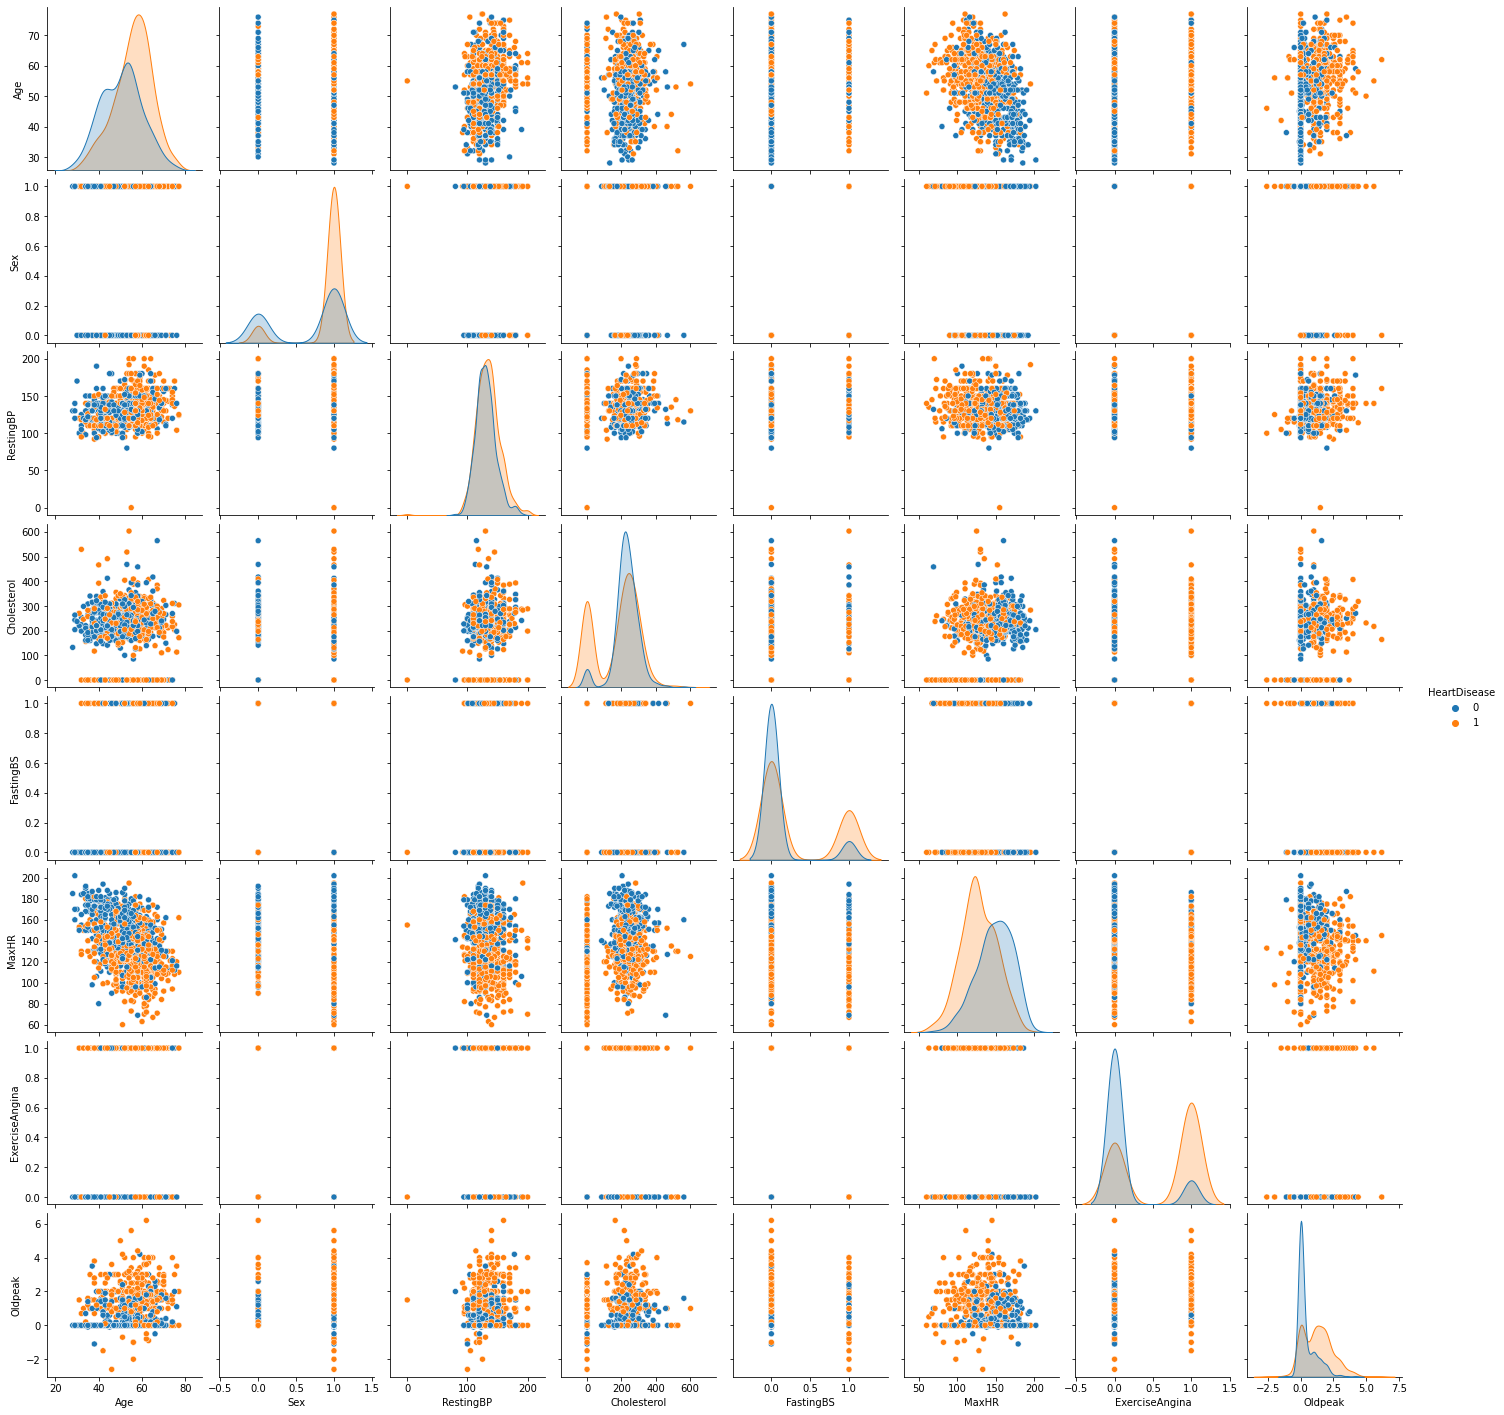

In [15]:
sns.pairplot(corazon, diag_kind='kde', hue='HeartDisease')

## Dividimos los datos

In [25]:
X=corazon.drop("HeartDisease",axis=1)
y=corazon["HeartDisease"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Entrenamos una regresion logística

In [27]:
model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [28]:
intercept = model.intercept_[0]
print("El intercept del modelo es {}".format(intercept))

El intercept del modelo es 0.26297903917307175


In [29]:
for i, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][i]))

The coefficient for Age is 0.014482562946244759
The coefficient for Sex is 0.9548711495471155
The coefficient for RestingBP is 4.6631351453778726e-05
The coefficient for Cholesterol is -0.003771987355350899
The coefficient for FastingBS is 1.035083047677973
The coefficient for MaxHR is -0.016475909712159183
The coefficient for ExerciseAngina is 1.6727929117063531
The coefficient for Oldpeak is 0.7099983404401531


## Evaluamos nuestro modelo

### Generamos las predicciones

In [30]:
predictions = model.predict(x_test)

### Matriz de confusión 

| | **Predije** (Predije Clase Negativa)| **Predije** (Predije Clase Positiva)|
|---|---|---|
| **No era** (Clase Negativa) | _True Negative_ | _False Positive_ |
| **Era** (Clase Positiva) | _False Negative_ | _True Positive_ | 

<AxesSubplot:>

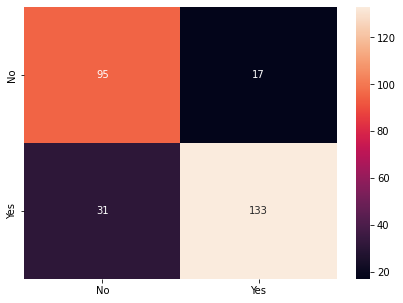

In [33]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

# Accuracy

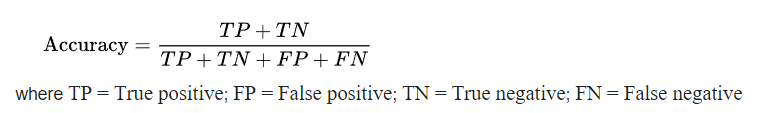

In [48]:
acc= accuracy_score(y_test, predictions)
print("El Accuracy del modelo es {}".format(acc))

El Accuracy del modelo es 0.8260869565217391


### _Precision_ y _Recall_

Si bien la matriz de confusión nos entrega varios valores a veces queremos algo más concreto. Dos medidas adicionales son _Precision_ y _Recall_. Vamos a presentarlas a continuación.


$$
\text{precision} = \frac{TP}{TP + FP}
$$

$$
\text{recall} = \frac{TP}{TP + FN}
$$

En donde $TP$ son los verdaderos positivos (_True Possitive_), $FP$ son los falsos positivos (_False Possitives_) y $FN$ los falsos negativos (_False Negatives_).

Para entender mejor de que se trata esto, centrémonos en el ejemplo:

- Un modelo de alta precisión está seguro de sus respuestas. En nuestro ejemplo, cada vez que el modelo diga que una imagen es un 7, si su precisión es alta, es porque está muy seguro de esto. Es decir, cada vez que clasifica algo de clase positiva, hay una alta probabilidad de que esté en lo correcto.
- Un modelo de alto _recall_ tiende a capturar la mayoría de los elementos de la clase positiva. En nuestro ejemplo, un modelo de alto _recall_ tendería a encontrar la mayoría de las imágenes que representan al número 7.

¿Por qué necesitamos dos valores? La respuesta la podemos entender con el siguiente ejemplo: supón que tenemos un modelo que solamente clasifica un elemento de forma correcta, pero está muy seguro de lo que hace. Así, los falsos positivos serán 0 y la precisión será $1/1$, que equivale al 100%. Así podemos entender la precisión como **cuando digo que algo es de una clase, qué porcentaje de las veces estoy en lo correcto** y el _recall_ como **de los positivos que existen, cuantos estoy detectando**. Veamos esta medida en nuestro clasificador de 7s.

Así, vemos que nuestro clasificador no está "realmente seguro" cuando dice que algo es un 7, mientras que sí detecta la mayoría de los 7. También existe otro puntaje en el que no vamos a hacer énfasis, pero es el $F_1$ _score_, que es la media armónica entre _Precision_ y _Recall_:

$$
F_1 = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

Que es una medida que beneficia a modelos con precisión y _recall_ similares. Pero a veces queremos modelos que beneficien la precisión o el _recall_. Pensemos en los siguientes casos:

- Queremos hacer un modelo que nos diga si ciertos medicamentos son seguros para la salud. Aquí nos interesa estar realmente seguros de si un medicamento es clasificado como seguro (positivo), a pesar de que podamos tener muchos falsos negativos. Aquí queremos alta precisión, a un costo de bajo _recall_.
- Queremos hacer un modelo que recomiende canciones a alguien. Quizás no nos importa equivocarnos a cambio de que todas las posibles canciones que le gustan a la persona sean recomendadas. Aquí tendremos varios falsos positivos, por lo que habrá una baja precisión, pero tendremos un alto _recall_, porque el objetivo era tener pocos falsos negativos.

In [35]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       112
           1       0.89      0.81      0.85       164

    accuracy                           0.83       276
   macro avg       0.82      0.83      0.82       276
weighted avg       0.83      0.83      0.83       276



## Que pasa si probamos con otras variables?

### Seleccionamos las variables

In [36]:
X2=corazon.drop(["HeartDisease","RestingBP","Cholesterol"] ,axis=1)
y2=corazon["HeartDisease"]

### Dividimos los datos

In [37]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.30, random_state = 42)

In [38]:
model2=LogisticRegression(solver='liblinear')
model2.fit(x2_train,y2_train)

LogisticRegression(solver='liblinear')

In [47]:
intercept2 = model2.intercept_[0]
print("El intercept del modelo es {}".format(intercept2))

El intercept del modelo es 0.091888938978683


In [40]:
for i, col_name in enumerate(x2_train.columns):
    print("The coefficient for {} is {}".format(col_name, model2.coef_[0][i]))

The coefficient for Age is 0.012472326485121516
The coefficient for Sex is 1.1019838705151885
The coefficient for FastingBS is 1.1976800501054865
The coefficient for MaxHR is -0.02070329480731578
The coefficient for ExerciseAngina is 1.5827546403964254
The coefficient for Oldpeak is 0.6844700644902282


## Generamos las predicciones

In [42]:
predictions2 = model2.predict(x2_test)

## Matriz de confusión

<AxesSubplot:>

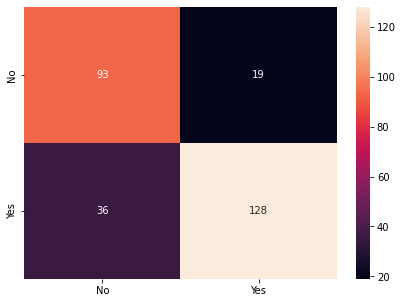

In [43]:
cm=metrics.confusion_matrix(y2_test, predictions2, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

## Accuracy

In [44]:
model_score2 = model2.score(x2_train, y2_train)
print("El Accuracy del modelo es {}".format(model_score2))

El Accuracy del modelo es 0.8037383177570093


## Precision y Recall

In [46]:
from sklearn import metrics
print(metrics.classification_report(y2_test, predictions2))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       112
           1       0.87      0.78      0.82       164

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.80      0.80       276

